# Mini Project - Sales Prediction
### Group 1: Abhishek, Daan & Nico

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
original_df = pd.read_csv("sales.csv")
sales = original_df.copy()

In [5]:
sales.head(50)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
5,687329,674,2,2013-03-19,1016,1,1,0,0,8406
6,600327,659,7,2014-06-08,0,0,0,0,0,0
7,96265,27,3,2014-07-16,1106,1,1,0,1,11162
8,364435,347,6,2013-05-11,448,1,0,0,0,5559
9,163146,288,2,2013-06-25,291,1,0,0,0,3997


In [6]:
sales.isna().any()

Unnamed: 0             False
store_ID               False
day_of_week            False
date                   False
nb_customers_on_day    False
open                   False
promotion              False
state_holiday          False
school_holiday         False
sales                  False
dtype: bool

In [7]:
sales["Unnamed: 0"].value_counts()

Unnamed: 0
305711    1
425390    1
291687    1
411278    1
664714    1
         ..
6368      1
431990    1
561067    1
163146    1
364435    1
Name: count, Length: 640840, dtype: int64

In [8]:
sales = sales.drop(columns = "Unnamed: 0")

all unique values, so probably just a counter to keep track of transactions?

In [9]:
sales["day_of_week"].value_counts()

day_of_week
5    92138
4    91972
2    91686
3    91651
6    91347
7    91075
1    90971
Name: count, dtype: int64

1 = Monday
4 = Thursday 
7 = Sunday

In [10]:
sales.groupby("day_of_week").sum()

,store_ID,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
day_of_week,,,,,,,,
1,50821718,2013-07-012014-02-172014-06-302015-03-092013-1...,73934358,86455,48942,000000000000000000000a000000000000000000000000...,21509,710735222
2,51157742,2013-05-282013-03-192013-06-252013-05-212015-0...,69801809,90597,48765,00000000000000000000000a0000000000000000000000...,22979,642240264
3,51144960,2014-07-162013-12-182015-06-102015-05-062015-0...,66095669,89281,48785,00000000000000000000000000000000000000000000a0...,21797,600804432
4,51307100,2013-04-182013-08-292013-10-102014-06-122014-0...,64236387,84889,49047,00000000000000000a00000000000000000000c0000000...,21885,575319834
5,51387461,2014-03-282014-06-062013-10-182015-06-192014-0...,68433136,87578,49081,000000000000a0000000a00000000000000000000a0000...,22765,619762820
6,50974301,2015-04-112013-05-112014-09-272015-03-282014-0...,60039657,90903,0,0000000000000000000000000000000000000000000000...,1726,534382948
7,50930878,2014-06-082014-10-052013-01-272014-06-082014-0...,3366128,2313,0,0000000000000000000000000000000000000000000000...,1711,19187721


While Sundays have less customers and sales in general, keeping the rows increases model performance

In [11]:
# sales = sales[sales["day_of_week"] != 7]
# After checking model performance, keeping the Sunday is valuable

In [12]:
sales["open"].value_counts()

open
1    532016
0    108824
Name: count, dtype: int64

In [13]:
sales["state_holiday"].value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

Mapping a,b,c to numbers

In [14]:
holidays = {
 "0" : "0",
 "a" : "1",
 "b" : "2",
 "c" : "3"}

sales.state_holiday = sales.state_holiday.map(holidays).astype(int)
sales["state_holiday"].value_counts()

state_holiday
0    621160
1     12842
2      4214
3      2624
Name: count, dtype: int64

"state_holiday" and "open" have quite high correlation so might want to drop state_holiday

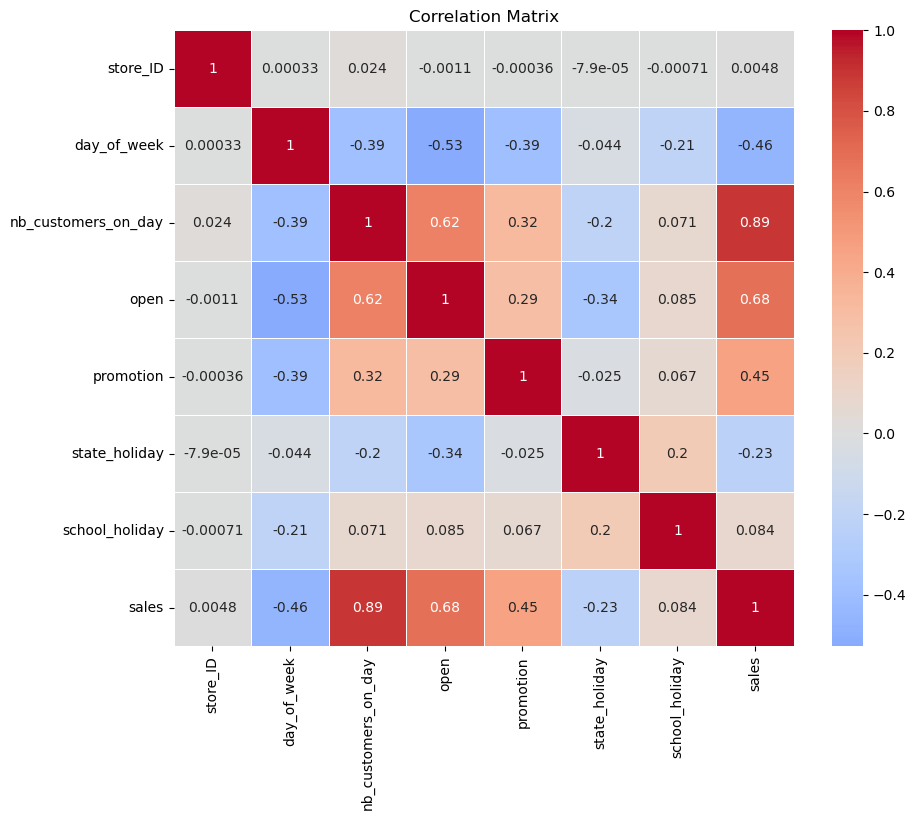

In [15]:
sales_numerical = sales.drop(columns = "date")
corr_matrix = sales_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
sales_state_holidays = sales[sales["state_holiday"] == 1]
sales_state_holidays.sum()

store_ID                                                         7197599
day_of_week                                                        43958
date                   2015-05-012013-05-202014-10-032014-05-012014-0...
nb_customers_on_day                                               542882
open                                                                 429
promotion                                                           4717
state_holiday                                                      12842
school_holiday                                                      3333
sales                                                            3626172
dtype: object

only open 1/30 state holidys, 3,6 million sales tho

In [17]:
# sales = sales.drop(columns = "state_holiday")
# comparing model scores indicates this feature has impact, so we keep it

In [18]:
sales["date"].value_counts()

date
2015-05-10    756
2014-05-23    746
2014-02-20    745
2014-05-22    741
2014-03-21    740
             ... 
2014-10-21    562
2014-09-11    561
2014-12-09    561
2014-09-27    559
2014-08-17    558
Name: count, Length: 942, dtype: int64

Using the dates to categeorize into years/season and holidays

In [19]:
sales['date'] = pd.to_datetime(sales['date'])
sales['year'] = sales['date'].apply(lambda x: x.year)
sales["year"].value_counts()

year
2013    256337
2014    235602
2015    148901
Name: count, dtype: int64

In [20]:
def get_holidays(date):

    month = date.month
    day = date.day
    if month == 12:
        if 1 <= day <= 24:
            return 0 # Christmas
        elif day == 31:
            return 1 # New Year's Eve   
        else:
            return 5
    elif month == 10:
        return 2 # Halloween season

    elif month == 11:
        if day == 28:
            return 3 # Black Friday
        else:
            return 5
    elif month == 7:
        if 1<= day <= 4:
            return 4 # 4th of July (American Independence Daya)
        else:
            return 5
    else:
        return 5 # no special holiday season
sales["holiday"] = sales["date"].apply(get_holidays)

In [21]:
def get_season(date):

    month = date.month
    if month in [12, 1, 2]:
        return 1 # this is Winter
    elif month in [3, 4, 5]:
        return 2 # this is Spring
    elif month in [6, 7, 8]:
        return 3 # this is Summer
    else:  # month in [9, 10, 11]
        return 4 # this is autumn
sales["season"] = sales["date"].apply(get_season).astype(int)


In [22]:
sales = sales.drop(columns = "date")

In [23]:
sales.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,holiday,season
0,366,4,517,1,0,0,0,4422,2013,5,2
1,394,6,694,1,0,0,0,8297,2015,5,2
2,807,4,970,1,1,0,0,9729,2013,5,3
3,802,2,473,1,1,0,0,6513,2013,5,2
4,726,4,1068,1,1,0,0,10882,2013,2,4


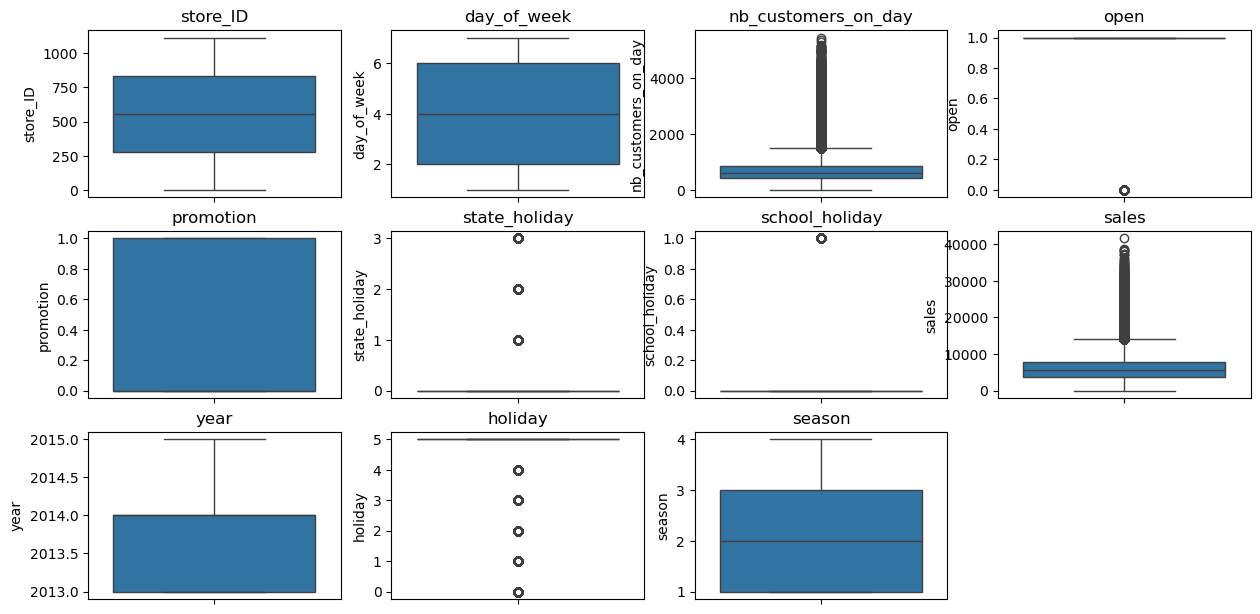

In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(sales):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=sales[col])
    plt.title(col)

keeping the outliers

In [25]:
X = sales.drop(columns = "sales")
y = sales["sales"]

## Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
lin = LinearRegression()

In [28]:
lin.fit(X_train, y_train)

LinearRegression()

In [29]:
lin.predict(X_train)
train_r2_score = lin.score(X_train, y_train)

In [30]:
lin.predict(X_test)
test_r2_score = lin.score(X_test, y_test)

In [31]:
print("r2_score on training data: ", train_r2_score)
print("r2_score on test data: ", test_r2_score)
print( "r2_score difference: ", train_r2_score - test_r2_score)

r2_score on training data:  0.8550628842558401
r2_score on test data:  0.8550388589507318
r2_score difference:  2.402530510825507e-05


## Polynomial Features

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=3, include_bias=False) # creating new columns with up to three features

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly_scaled, y_train)

y_pred_poly = poly_lin_reg.predict(X_test_poly_scaled)
y_pred_poly_train = poly_lin_reg.predict(X_train_poly_scaled)

r2_score_poly = r2_score(y_test, y_pred_poly)
r2_score_poly_train = r2_score(y_train, y_pred_poly_train)
print("--- Polynomial Regression Results ---")
print(f"Original number of features: {X_train.shape[1]}")
print(f"Transformed number of features: {X_train_poly.shape[1]}")

print(f"R-squared score on Train Data: {r2_score_poly_train:.4f}")
print(f"R-squared score on Test Data: {r2_score_poly:.4f}")
r2_score_poly_train - r2_score_poly
#print(f"New feature names: {poly.get_feature_names_out(X.columns)}")

--- Polynomial Regression Results ---
Original number of features: 10
Transformed number of features: 285
R-squared score on Train Data: 0.8802
R-squared score on Test Data: 0.8790


0.0012508840713617575

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
n_estimators_range = [15,20]
# testing different hyperparameters

#for i in n_estimators_range:
#    regressor = RandomForestRegressor(n_estimators=i, random_state=0)
#    regressor.fit(X_train, y_train)#
#
#    predictions = regressor.predict(X_train)
#    r2 = r2_score(y_train, predictions)
#    print(f'R-squared train: {r2} for n_estimators = {i}')#
#
#    predictions = regressor.predict(X_test)
#    r2 = r2_score(y_test, predictions)
#    print(f'R-squared test: {r2} for n_estimators = {i}')

XGBoost

In [49]:
# import xgboost as xgb
# model = xgb.XGBRegressor(learning_rate = 0.3, max_depth= 7, n_estimators= 200, subsample= 1)
# X_train_array = np.array(X_train)
# y_train_array = np.array(y_train)
# model.fit(X_train_array,y_train_array)
# sort_idx = model.feature_importances_.argsort()
# plt.barh(X_train.columns[sort_idx], model.feature_importances_[sort_idx])
# plt.show();

In [52]:
# predictions = sales.predict(X_train)
# r2 = r2_score(y_train, predictions)
# print(f'R2_score train: {r2}')

# predictions = sales.predict(X_test)
# r2 = r2_score(y_test, predictions)
# print(f'R2_score test: {r2}')

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from xgboost import XGBRegressor

#params = {
#    'n_estimators': [100, 200],
#    'max_depth': [3, 5, 7],
#    'learning_rate': [0.01, 0.1, 0.3],
#    'subsample': [0.8, 1],
#}
#
#xgb = XGBRegressor(objective="reg:squarederror")
#grid = GridSearchCV(estimator=xgb, param_grid=params, cv=5, scoring='r2', verbose=1)
#grid.fit(X, y)
#
#print("Best R²:", grid.best_score_)
#print("Best Params:", grid.best_params_)

#Fitting 5 folds for each of 36 candidates, totalling 180 fits
#Best R²: 0.9424574494361877
#Best Params: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}

In [ ]:
#from xgboost import plot_importance

#plot_importance(grid.best_estimator_)
#plt.show()

# Deliverables

In [42]:
test_data = pd.read_csv("REAL_DATA.csv")
real_data = test_data.copy()
real_data.head()


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [45]:
sales.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,holiday,season
0,366,4,517,1,0,0,0,4422,2013,5,2
1,394,6,694,1,0,0,0,8297,2015,5,2
2,807,4,970,1,1,0,0,9729,2013,5,3
3,802,2,473,1,1,0,0,6513,2013,5,2
4,726,4,1068,1,1,0,0,10882,2013,2,4


In [46]:
holidays = {
 "0" : "0",
 "a" : "1",
 "b" : "2",
 "c" : "3"}

real_data.state_holiday = real_data.state_holiday.map(holidays).astype(int)

real_data['date'] = pd.to_datetime(real_data['date'], dayfirst = True)


In [47]:
real_data['year'] = real_data['date'].apply(lambda x: x.year)
real_data["holiday"] = real_data["date"].apply(get_holidays)
real_data["season"] = real_data["date"].apply(get_season).astype(int)

real_data = real_data.drop(columns = ["date", "index"])


In [53]:

# Linear Regression
#lin= LinearRegression().fit(X_train, y_train)
#real_data["sales_linear_regression"] = lin.predict(real_data)

# Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=20, random_state=0).fit(X_train, y_train)
test_data["sales"] = random_forest.predict(real_data).astype("int64")

output_filename = 'G1.csv'
test_data.to_csv(output_filename, index=False) # index=False prevents writing the DataFrame index as a column

# Best r2_score
predictions = random_forest.predict(X_test)
r2 = r2_score(y_test, predictions)

output_filename = 'G1.txt'
with open(output_filename, 'w') as file:
# Convert the r2 value to a string before writing
    file.write(str(r2))

# XGBoost Regressor
#xgb_model = xgb.XGBRegressor(learning_rate = 0.3, max_depth= 7, n_estimators= 200, subsample= 1).fit(X_train, y_train)
#real_data["sales_xgboost_regression"] = xgb_model.predict(real_data)
